In [112]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [113]:
#create a model class that inherits nn.Module 
class Model(nn.Module):
    #Input layer (4 features of flower)-->
    #Hidden layer 1(number of neurons)--->
    #H2(neurons)--->
    #Output(3 classes of flowers)
    def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
        super().__init__()  #instantiates our nn.module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)   #fc in variable names stands for fully connected 
        
    def forward(self, x):
    #relu - rectified linear unit is an activation function used in deep learning. The function will return the value as 0 if the value is negative or less than 0. If the value is positive then it will give the same value as output. 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
    
        return x

In [114]:
#Pick a manual seed for randomisation
torch.manual_seed(42)
#Create an instance for the model
model = Model()        #this is basically to activate our model and make them go forwards

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [116]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [117]:
#converting the species column from strings to int because ml works well with numbers 
my_df["species"] = my_df["species"].replace("setosa", 0.0)
my_df["species"] = my_df["species"].replace("versicolor", 1.0)
my_df["species"] = my_df["species"].replace("virginica", 2.0)
my_df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [118]:
#train, test and split dataset! set X and y
X = my_df.drop("species", axis =1)  #dropping species column 
y = my_df["species"]


In [119]:
#convert these to numpy arrays 
X = X.values
y = y.values


In [120]:
#Train test and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [121]:
#convert x labels to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [122]:
#convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [123]:
#set the model criterion to measure the error, this tells how far off the predicitions are from our data 
criterion = nn.CrossEntropyLoss()

#Choosing an optimizer and setting the learning rate(lr), lr is set because after a certain number of iterations if the error does not go down then the learning rate must be reduced 
#we will select Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [124]:
#training the model
#epochs = it basically is one complete run the neural network (1 full iteration)
#we will create a list for losses to keep an account of it as we need to check if the losses will reduce by time, if it does not reduce then the nn is not trained properly
epochs = 100
losses = []
for i in range(epochs):
    #getting forward and prediction
    y_pred = model.forward(X_train)  
    
    #measure the error/loss, this will be high at first
    loss = criterion(y_pred, y_train) #predicted values vs y_train
    
    #keeping track of losses
    losses.append(loss.detach().numpy())  #converting loss into numpy values
    
    #print every 10 epochs
    if i%10 == 0:
        print(f"epochs : {i}, loss : {loss}")
        
    #use backpropagation which is AI algorithm that trains the neural network by error correction
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epochs : 0, loss : 1.0846848487854004
epochs : 10, loss : 0.9183797240257263
epochs : 20, loss : 0.7622429132461548
epochs : 30, loss : 0.627383291721344
epochs : 40, loss : 0.4667472243309021
epochs : 50, loss : 0.2877059578895569
epochs : 60, loss : 0.16738910973072052
epochs : 70, loss : 0.10598883032798767
epochs : 80, loss : 0.08021349459886551
epochs : 90, loss : 0.06947018206119537


Text(0.5, 0, 'epoch')

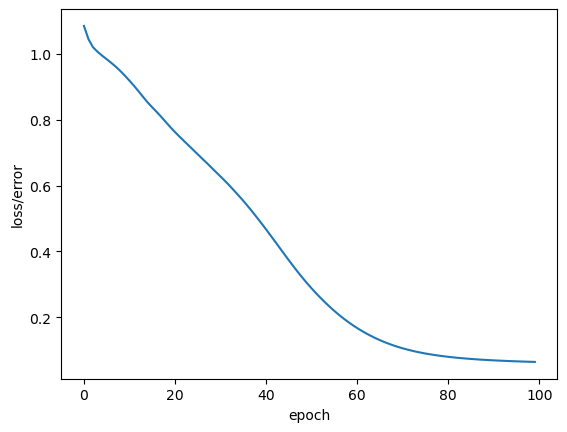

In [125]:
#visualising the result 
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [126]:
#evaluating the test model on test data (validating the model on test set)
with torch.no_grad(): #turning off the back propagation 
    #X test are the features from the test data, y_eval will be the predictions for these
    y_eval = model.forward(X_test)
    #finding the loss by y_eval vs y_pred
    loss = criterion(y_eval, y_test)

In [127]:
loss

tensor(0.0634)

In [129]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
        
        #will tell us what type of flower class our network thinks it is 
        print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")
        
        #lets check how many correct results we are getting
        if y_val.argmax().item() == y_test[i]:
            correct += 1 
    
print(f"we got {correct} correct")

1.) tensor([-1.4120,  6.3133,  2.6088]) 	 1 	 1
2.) tensor([ 8.4023,  2.4573, -7.5391]) 	 0 	 0
3.) tensor([-12.1991,   1.1829,  13.7443]) 	 2 	 2
4.) tensor([-1.6752,  5.9271,  2.8622]) 	 1 	 1
5.) tensor([-1.5887,  6.7559,  2.8371]) 	 1 	 1
6.) tensor([ 7.8451,  2.3289, -7.0010]) 	 0 	 0
7.) tensor([ 1.1273,  6.0707, -0.0493]) 	 1 	 1
8.) tensor([-5.2088,  4.4484,  6.5316]) 	 2 	 2
9.) tensor([-3.2614,  4.9128,  4.4788]) 	 1 	 1
10.) tensor([0.5683, 6.5565, 0.5445]) 	 1 	 1
11.) tensor([-4.3492,  4.7780,  5.6344]) 	 2 	 2
12.) tensor([ 7.3631,  2.0552, -6.5497]) 	 0 	 0
13.) tensor([ 8.1384,  2.3552, -7.2879]) 	 0 	 0
14.) tensor([ 7.4936,  2.1057, -6.6740]) 	 0 	 0
15.) tensor([ 7.8643,  2.2491, -7.0269]) 	 0 	 0
16.) tensor([-1.3322,  6.5325,  2.5448]) 	 1 	 1
17.) tensor([-8.2712,  2.4244,  9.6406]) 	 2 	 2
18.) tensor([0.3374, 6.4826, 0.7657]) 	 1 	 1
19.) tensor([-1.5909,  5.7677,  2.7565]) 	 1 	 1
20.) tensor([-8.1891,  2.2739,  9.5411]) 	 2 	 2
21.) tensor([ 7.2431,  2.0816, -

In [131]:
#lets try to upload new data in our network and see how it works
new_iris = torch.tensor([4.7, 2.0, 3.1, 0.2])
with torch.no_grad():
    print(model(new_iris))

tensor([ 2.4275,  4.5716, -1.4627])


In [132]:
#lets verify by uploading exisiting numbers
newer_iris = torch.tensor([6.3, 2.5, 5.0, 1.9])
with torch.no_grad():
    print(model(newer_iris))

tensor([-5.7279,  3.5590,  7.0107])
